# COMPAS Recidivism

https://www.kaggle.com/datasets/danofer/compass

https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing

In [1]:
# !pip install shap

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# recidivism_filepath = "../data/propublica_data_for_fairml.csv"
recidivism_filepath = "https://raw.githubusercontent.com/aoguedao/ds4sj-brown/main/data/propublica_data_for_fairml.csv"
recidivism_df = pd.read_csv(recidivism_filepath, low_memory=False)
recidivism_df.head()

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0
2,1,4,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1
4,1,14,1,0,0,0,0,0,0,0,0,0


In [4]:
recidivism_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Two_yr_Recidivism,6172.0,0.455120,0.498022,0.0,0.0,0.0,1.0,1.0
Number_of_Priors,6172.0,3.246436,4.743770,0.0,0.0,1.0,4.0,38.0
score_factor,6172.0,0.445723,0.497086,0.0,0.0,0.0,1.0,1.0
Age_Above_FourtyFive,6172.0,0.209494,0.406981,0.0,0.0,0.0,0.0,1.0
Age_Below_TwentyFive,6172.0,0.218244,0.413087,0.0,0.0,0.0,0.0,1.0
African_American,6172.0,0.514420,0.499833,0.0,0.0,1.0,1.0,1.0
Asian,6172.0,0.005023,0.070698,0.0,0.0,0.0,0.0,1.0
Hispanic,6172.0,0.082469,0.275101,0.0,0.0,0.0,0.0,1.0
Native_American,6172.0,0.001782,0.042182,0.0,0.0,0.0,0.0,1.0
Other,6172.0,0.055574,0.229115,0.0,0.0,0.0,0.0,1.0


In [5]:
X = recidivism_df.drop(columns="Two_yr_Recidivism")
X

,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,4,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,1
4,14,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6167,0,1,0,1,1,0,0,0,0,0,0
6168,0,0,0,1,1,0,0,0,0,0,0
6169,0,0,1,0,0,0,0,0,1,0,0
6170,3,0,0,0,1,0,0,0,0,1,1


In [6]:
y = recidivism_df["Two_yr_Recidivism"]
y

0       0
1       1
2       1
3       0
4       1
       ..
6167    0
6168    0
6169    0
6170    0
6171    1
Name: Two_yr_Recidivism, Length: 6172, dtype: int64

## Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [18]:
model.score(X, y)

0.7286130913804277

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

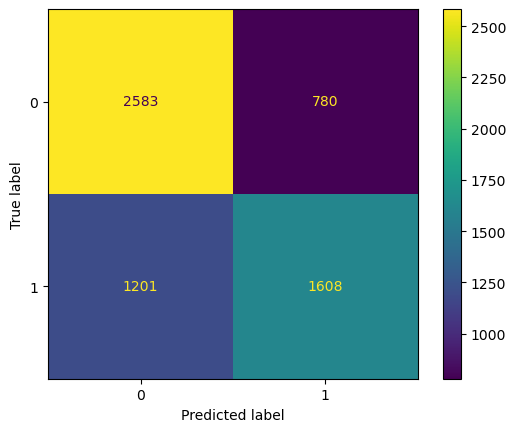

In [10]:
ConfusionMatrixDisplay.from_estimator(model, X, y)

## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [ ]:
model.score(X, y)

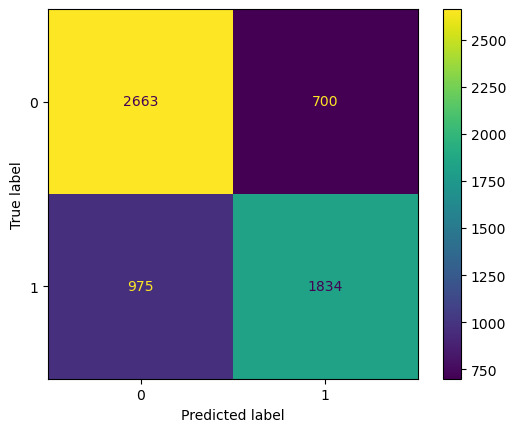

In [13]:
ConfusionMatrixDisplay.from_estimator(model, X, y)

## Explainability

In [14]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [15]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

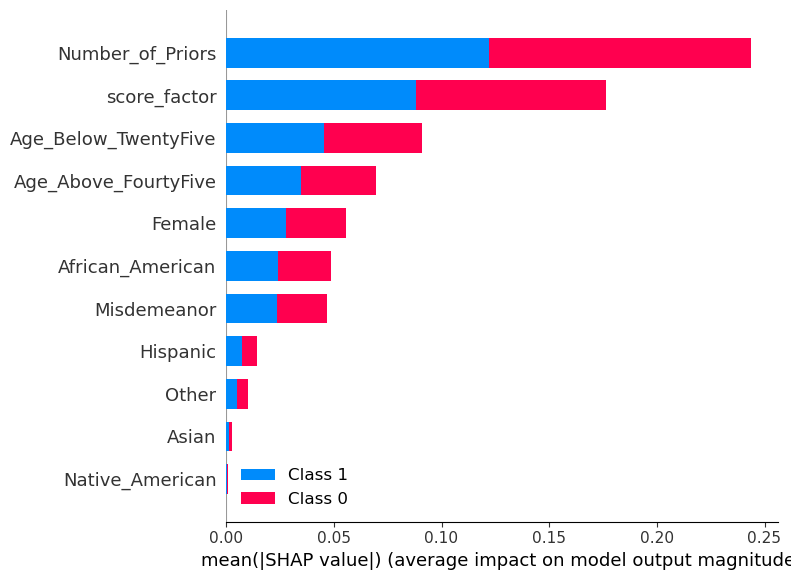

In [16]:
shap.summary_plot(shap_values, X)

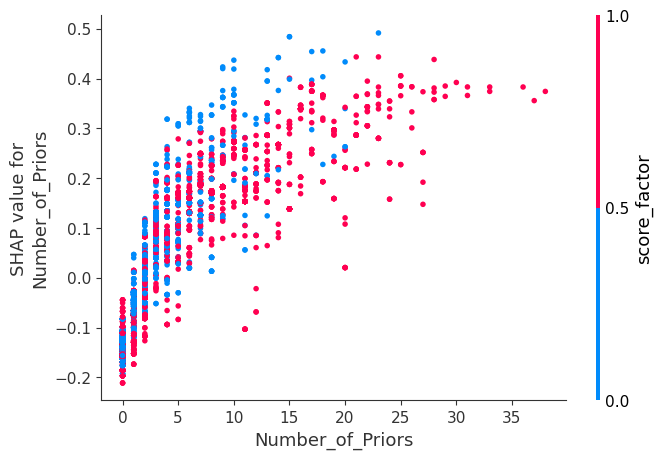

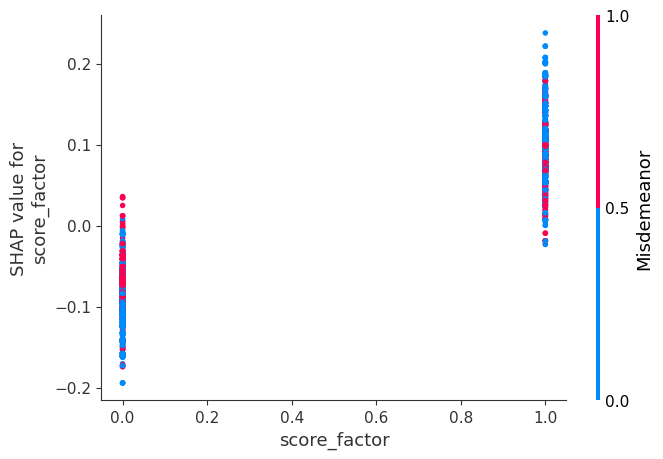

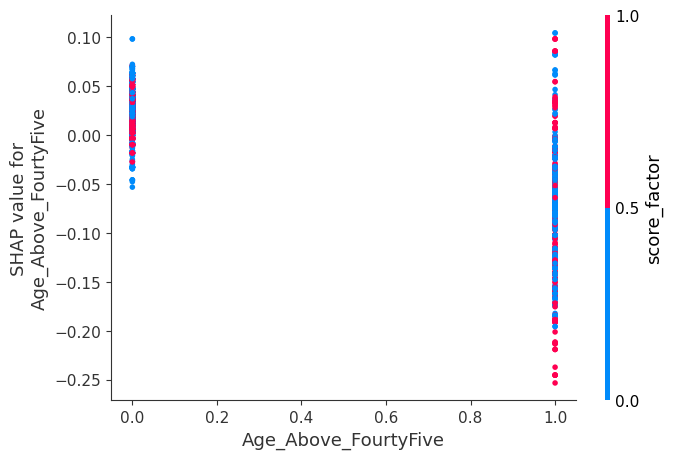

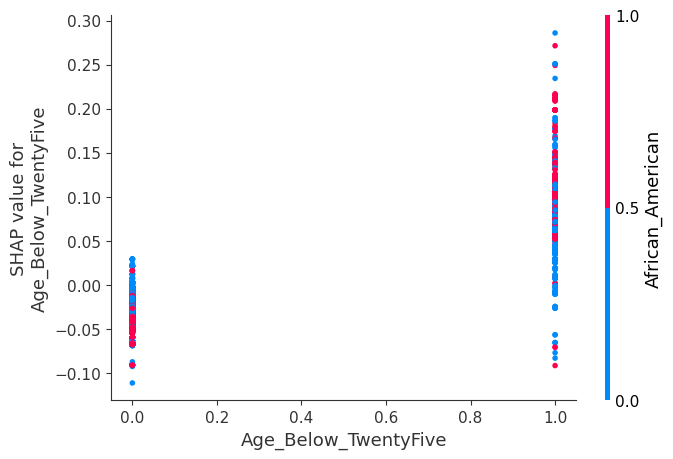

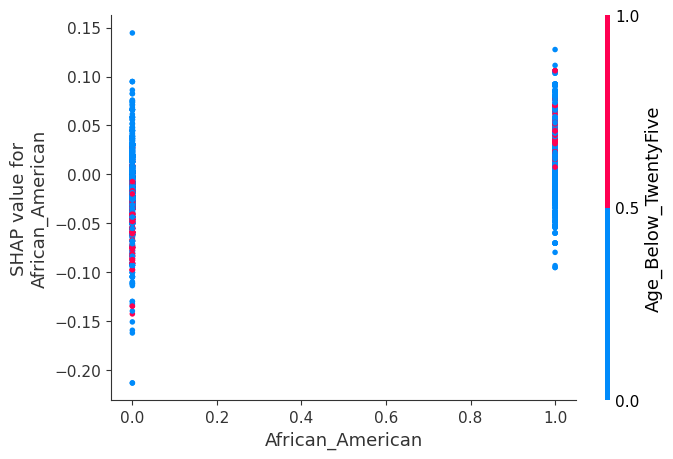

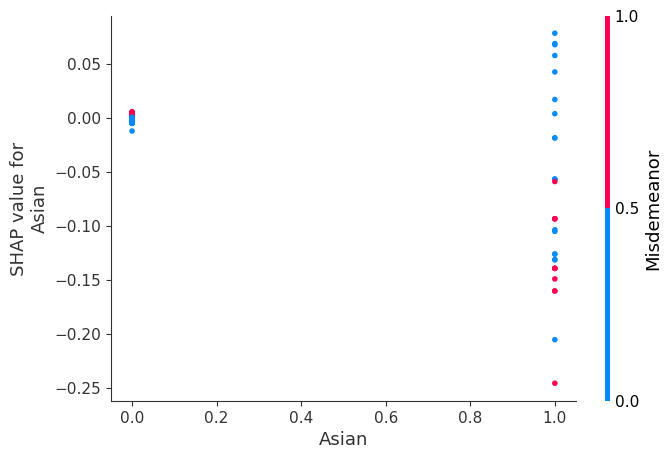

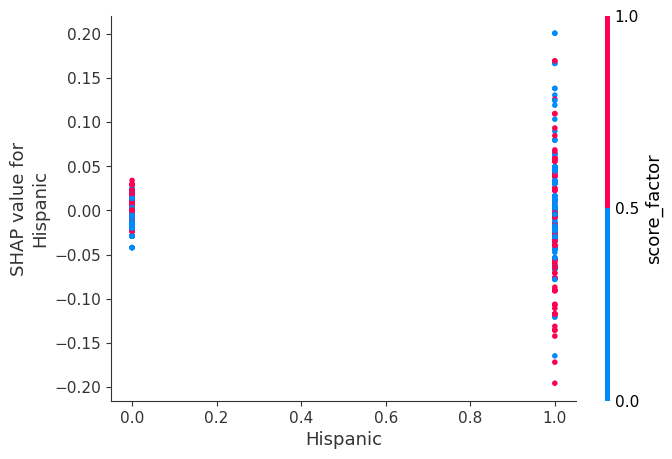

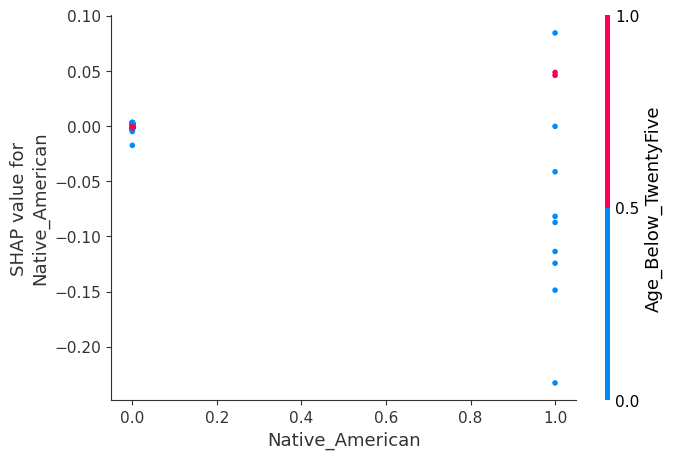

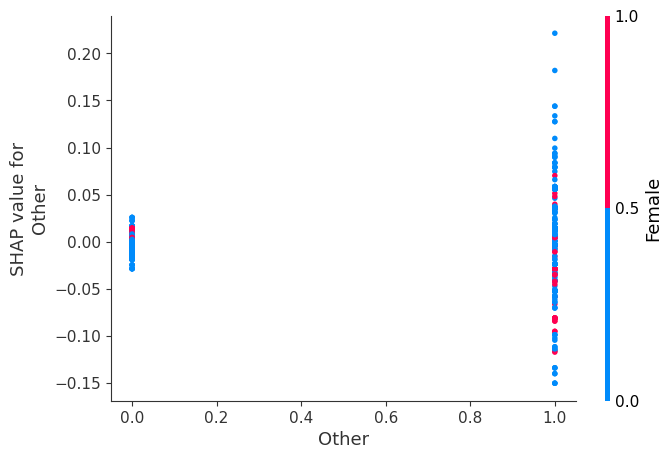

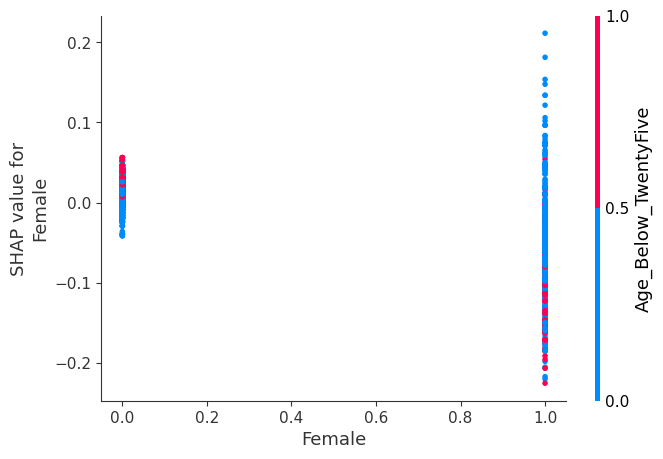

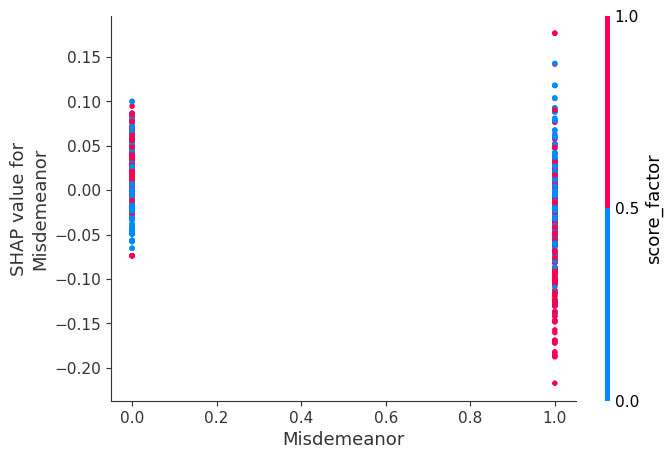

In [17]:
for name in X.columns:
    shap.dependence_plot(name, shap_values[1], X, display_features=X)